## Solution Planning

- First look at the dataset.
- Cleaning Dataset.
- EDA.
- Modeling.
- Modeling evaluation.
- Solution delivery.

## Imports

In [243]:
import plotly
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px

from pandas_profiling import ProfileReport

### Helper Functions

In [356]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
 
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 10]
    plt.rcParams['font.size'] = 50
  
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
  
    sns.set()

def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(float(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

## Load Dataset

In [4]:
df = pd.read_csv('data/churn.csv')

## First Look at the Dataset.

In [8]:
# Check first rows

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Check df shape

df.shape

(10000, 14)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [10]:
# Check dtypes

df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# Check for NAN

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations:**
- At the first look, the dataset seems to be already pretty cleaned.
- Gender must to be encoded.

## Data Cleaning

In [17]:
# exclude RowNumber column - this columns in just an row index and is not necessary.

df.drop(columns = 'RowNumber', inplace=True)

- The dataset is pretty cleaned, the gender encoding will be done after the EDA.

## EDA

**EDA Planning:**

1. Univariate analysis.
2. Hypothesis formulation.
3. Bivariated analysis - hypothesis validation.
4. Multivariate analysis.
5. Insights generation.

### Univariated Analysis - Pandas Profiling Report.

In [18]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
# Pandas Proffiling

report1 = ProfileReport(df, 'Churn Prediction Dataset 1st Report')
report1.to_file(output_file = 'reports/pp_report1.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
report1

### Hypothesis Formulation

H1. Male customers are mole likely to churn than female customers.

H2. Younger customers are mole likely to churn than older customers.

H3. Customers with less time as customers are mole likely to churn.

H4. Customers with less balance values are more likely to churn.

H5. Customer with less bank products are more likely to churn.

H6. Customer without creditcard are more likely to churn.

H7. Active members are less likely to churn.

H8. Customer eith bigger salary are less likely to churn.

### Bivariated analysis - hypothesis validation. 

#### H1. Male customers are mole likely to churn than female customers.

In [358]:
df_gender = df.groupby(['Gender'])['Exited'].value_counts(normalize=True).round(3)
df_gender = df_gender.mul(100).rename('Percent').reset_index()

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



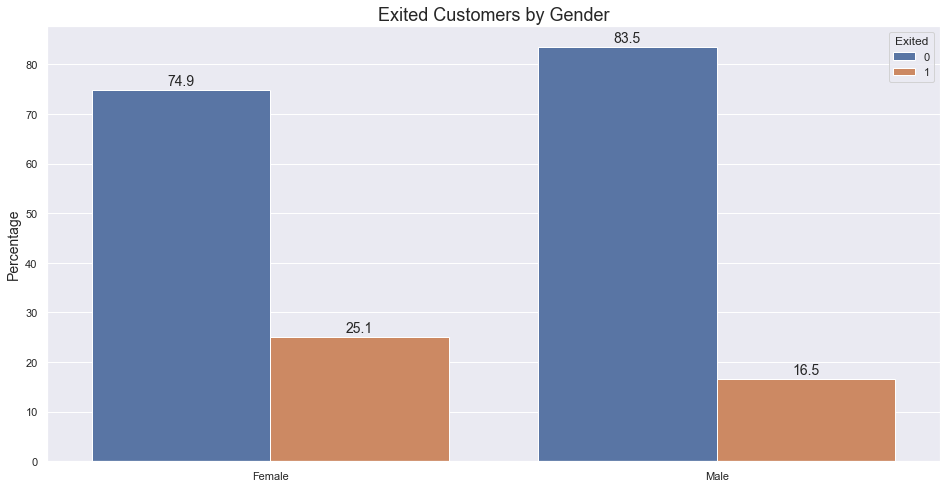

In [359]:
ax = sns.barplot('Gender', 'Percent', hue = 'Exited', data=df_gender)
ax.set_title('Exited Customers by Gender', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('Percentage', fontsize=14)
annot_plot(ax)

**H1 Validation: FALSE**

    - Accordingly the data, women are more likely to churn than men.
        - More than 25% of women have exited the bank, while only 16,45% of man have exited.

#### H2. Younger customers are mole likely to churn than older customers.

In [365]:
df_age = df.copy()
df_age['AgeGroup'] = df_age['Age'].apply(lambda x: 'Young' if x < 30 else 'Elder')

In [366]:
df_age = df_age.groupby('AgeGroup')['Exited'].value_counts(normalize=True).round(2)
df_age = df_age.mul(100).rename('Percent').reset_index()

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



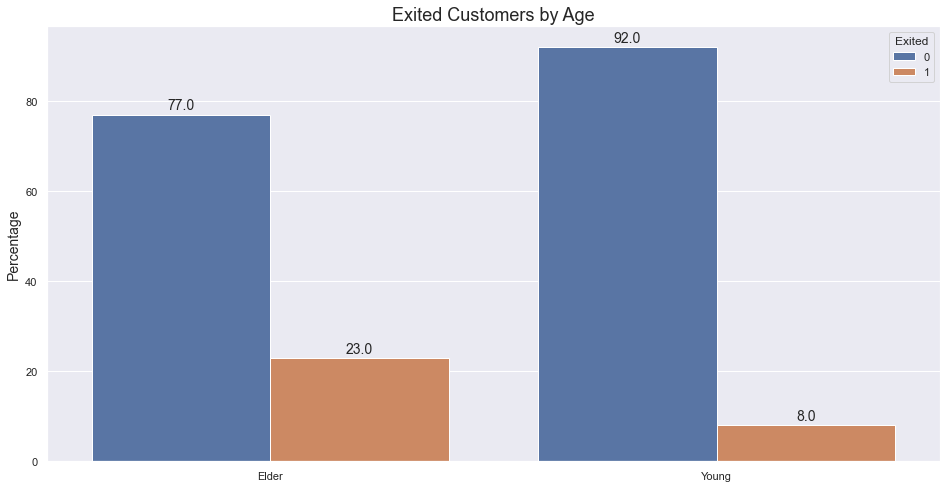

In [367]:
ax = sns.barplot('AgeGroup', 'Percent', hue = 'Exited', data=df_age)
ax.set_title('Exited Customers by Age', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('Percentage', fontsize=14)
annot_plot(ax)

**H2 Validation: FALSE**

    - Accordingly the data, elder customers are more likely to churn than younger.
        - 23% of elder customers have exited the bank, while only 8% of younger customers have exited.

ustomers with less time as customers#### H3. Customers with less time as customers are mole likely to churn.

In [387]:
df_tenure = round(df.groupby('Tenure')['Exited'].value_counts(normalize=True),2)
df_tenure = df_tenure.mul(100).rename('Percent').reset_index()

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



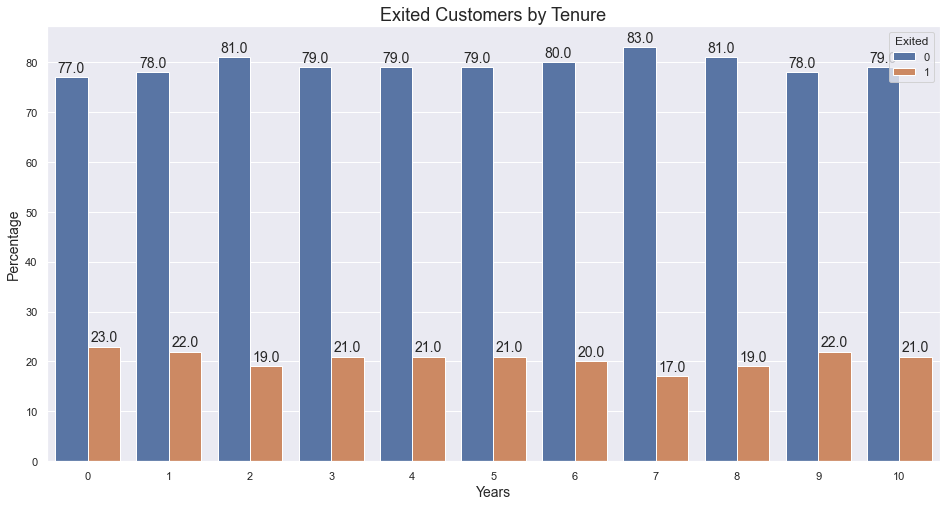

In [391]:
ax = sns.barplot('Tenure', 'Percent', hue = 'Exited', data=df_tenure)
ax.set_title('Exited Customers by Tenure', fontsize = 18)
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
annot_plot(ax);

**H3 Validation: INCONCLUSIVE**

    - Accordingly the data, customers with less time as customers have almost the same exited proportion as customer with more time.
        - Customer with less than 4 years as customer have a rengo from 19% to 23% outings, while customer with more than 3 years have a renge from 17% to 22%, almost the same